<a href="https://colab.research.google.com/github/Cliff12001/IMSE-441/blob/main/IMSE_441_Lab_11_Follow_Along.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [2]:
url = "https://raw.githubusercontent.com/KhmAsif/IMSE441/main/Titanic_train.csv"
df = pd.read_csv(url)
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [56]:
#data types
df.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [5]:
#remove the columns not required 
df = df.drop(['PassengerId','Name','Ticket','Cabin'],axis = 1)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [6]:
# remove rows with missing value
df = df.dropna()

**Gender**

In [8]:
# find out how many unique values in each column
df['Sex'].nunique()

2

In [9]:
#how many females/males
df.groupby('Sex').size()

Sex
female    259
male      453
dtype: int64

<Axes: xlabel='Sex'>

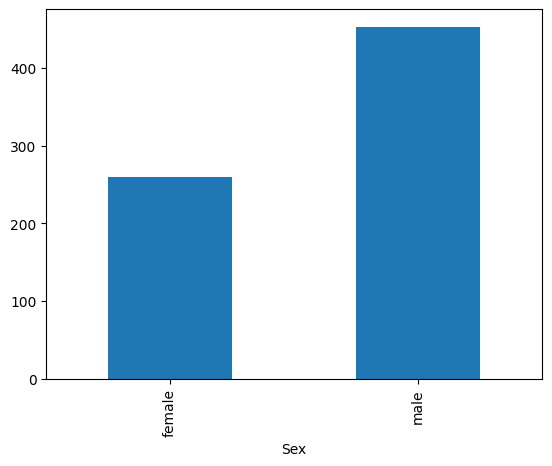

In [11]:
#bar plot by count
df.groupby('Sex').size().plot(kind='bar')

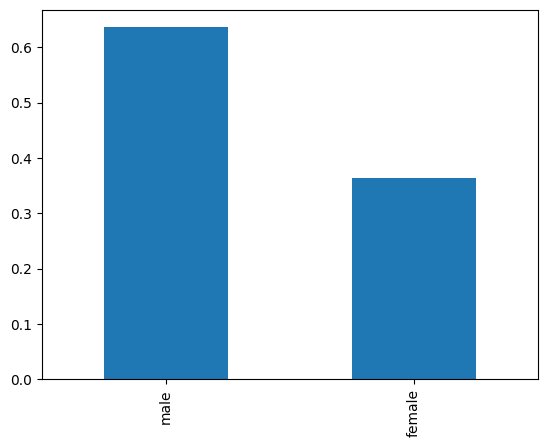

In [10]:
#bar plot by ratio
df['Sex'].value_counts(normalize=True).plot(kind='bar');

<Axes: >

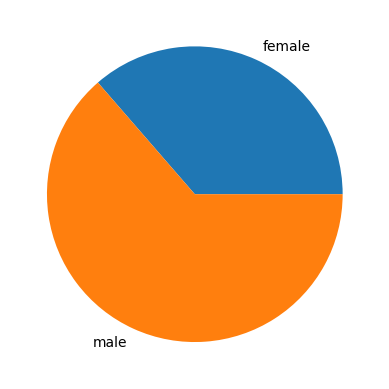

In [60]:
#What percentage female/male
df.groupby('Sex').size().plot(kind='pie')

**Pclass**

In [54]:
# How many passengers in each class?
d = df.groupby('Pclass').size()
d

Pclass
1    184
2    173
3    355
dtype: int64

<Axes: >

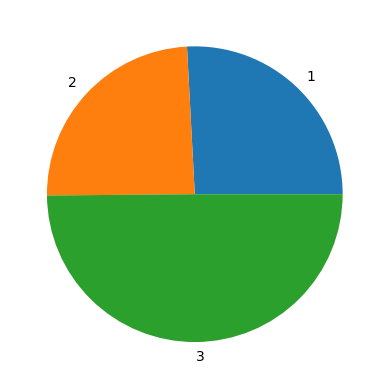

In [59]:
df.groupby('Pclass').size().plot(kind='pie')

<Axes: xlabel='Pclass'>

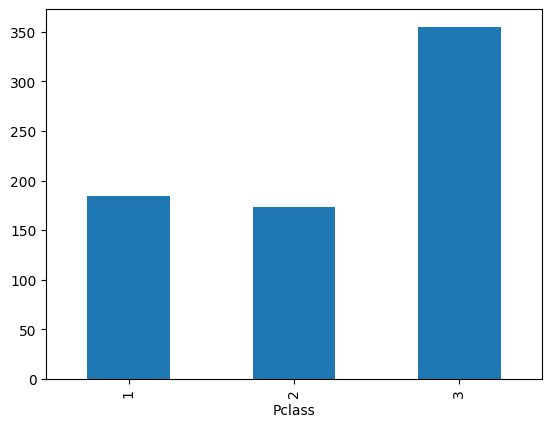

In [47]:
#bar plot
df.groupby('Pclass').size().plot(kind='bar')

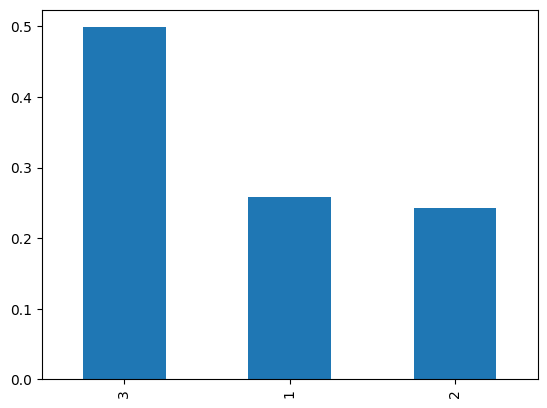

In [48]:
#bar plot by ratio
df['Pclass'].value_counts(normalize=True).plot(kind='bar');

Survived Class

In [49]:
df['Survived'].nunique()

2

In [50]:
df.groupby('Survived').size()

Survived
0    424
1    288
dtype: int64

<Axes: xlabel='Survived'>

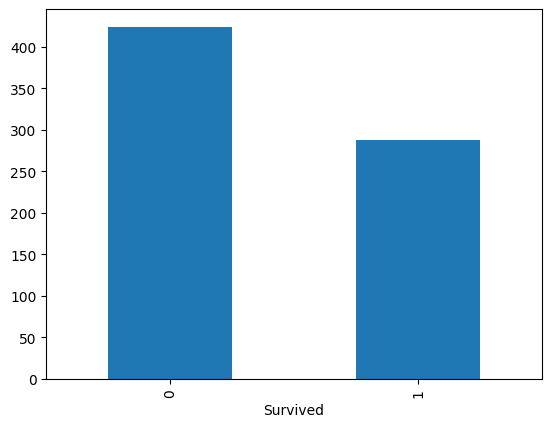

In [51]:
df.groupby('Survived').size().plot(kind='bar')

<Axes: >

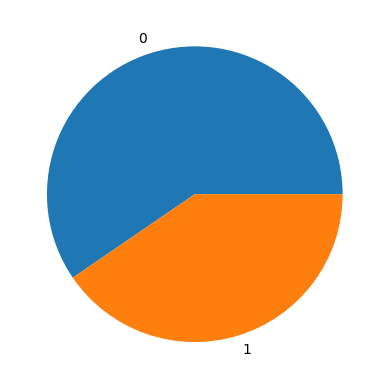

In [52]:
df.groupby('Survived').size().plot(kind='pie')

**Embarked**

In [14]:
# How many passengers from each port? Pie chart and bar chart
g = df.groupby('Embarked').size()
g

Embarked
C    130
Q     28
S    554
dtype: int64

In [15]:
#Report maximum and minimum from which port?
df['Embarked'].min()

'C'

In [16]:
df['Embarked'].max()

'S'

In [19]:
#how many survived from each port
g = df.groupby(['Embarked','Survived']).size().unstack()
g

Survived,0,1
Embarked,,
C,51,79
Q,20,8
S,353,201


<Axes: xlabel='Embarked'>

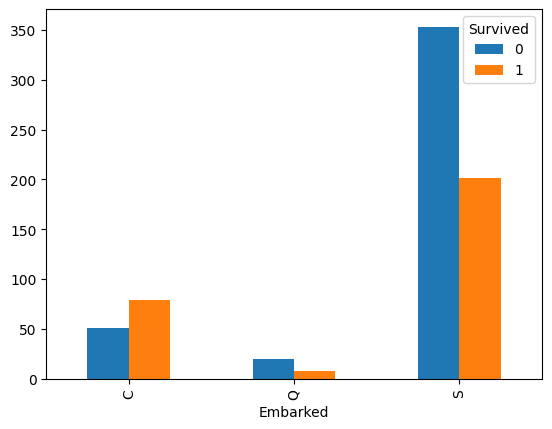

In [22]:
#bar plot
g.plot(kind= 'bar')

In [23]:
#display data for 2 siblings
df.loc[df['SibSp'] == 2].head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
38,0,3,female,18.0,2,0,18.0000,S
69,0,3,male,26.0,2,0,8.6625,S
104,0,3,male,37.0,2,0,7.9250,S
120,0,2,male,21.0,2,0,73.5000,S
147,0,3,female,9.0,2,2,34.3750,S


In [28]:
#separate dataframe 
s = df[df['Survived'] == 1]  # those survived      
ns = df[df['Survived'] == 0]  # those NOT survived
print(len(s), len(ns))

288 424


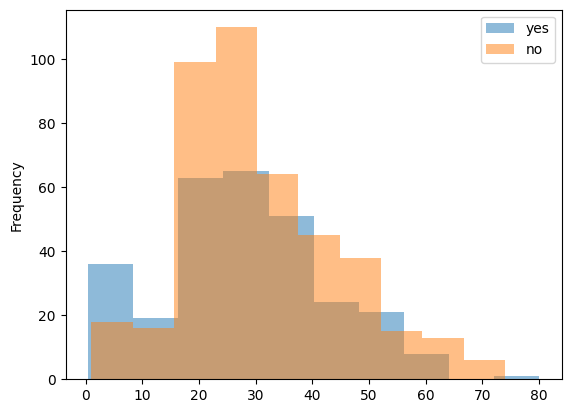

In [30]:
#do for age and plot bar
s['Age'].plot(kind= 'hist', alpha = 0.5)
ns['Age'].plot(kind= 'hist', alpha = 0.5)
plt.legend(['yes','no'])

In [31]:
g = df.groupby(['Pclass','Sex','Survived']).size().unstack()
g

Survived         0   1
Pclass Sex            
1      female    3  80
       male     61  40
2      female    6  68
       male     84  15
3      female   55  47
       male    215  38

<Axes: xlabel='Pclass,Sex'>

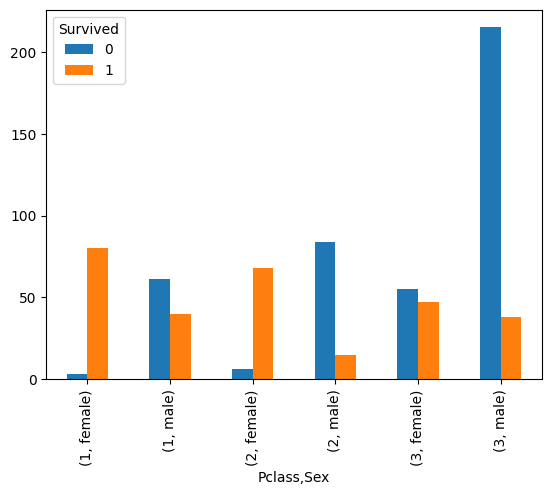

In [32]:
#bar plot
g.plot(kind= 'bar')

In [35]:
# AND condition
#gender to be female, pclass to be 1, and how many of them survived
len(df[(df['Sex'] == 'female') & (df['Pclass'] == 1) & (df['Survived'] == 1)])

80

In [37]:
# OR condition
#how many people have 4/5 siblings
len(df[(df['SibSp']==4)|(df['SibSp']==5)])

23

In [40]:
df['SibSp'].min()

0

In [39]:
df['SibSp'].max()

5

In [38]:
from scipy.stats import norm

From the code above we can see that for "Sex" there were 259 females on the boat and 453 males. For Pclass 1, there were 184 people, for 2 there were 173, and for 3 there were 355 people. Out of everyone on board the titanic 424 people died and 288 survived. For the three ports, 130 people departed from port C, 28 people from port Q, and 554 from port S. 79 people who boarded the ship at port C died, and 51 survived. 8 people died and 20 survived from port Q, and 201 people survived and 353 died from port S. Of the total male and females aboard the ship, 64 females died and 195 survived. 360 males died and 93 survived.